In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as layers

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
filepath = "/kaggle/input/playground-series-s3e25/train.csv"

dataset = pd.read_csv(filepath)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [4]:
y = dataset.pop('Hardness')
x = dataset

### Check dataset

In [5]:
x.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [6]:
y.head()

0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

# Inspect hardness values

If they are continous or discrete

In [7]:
y.describe()

count    10407.000000
mean         4.647126
std          1.680525
min          1.000000
25%          3.000000
50%          5.500000
75%          6.000000
max         10.000000
Name: Hardness, dtype: float64

In [8]:
hardness_set = set(y)
print(sorted(hardness_set))
print(len(hardness_set))

[1.0, 1.3, 1.5, 1.8, 2.0, 2.1, 2.2, 2.3, 2.5, 2.6, 2.8, 2.9, 3.0, 3.2, 3.3, 3.5, 3.6, 3.8, 4.0, 4.1, 4.3, 4.5, 4.7, 4.8, 5.0, 5.3, 5.4, 5.5, 5.75, 5.8, 6.0, 6.2, 6.3, 6.4, 6.5, 6.64, 6.7, 6.8, 7.0, 7.3, 7.5, 7.8, 8.0, 8.1, 8.3, 8.5, 9.0, 9.5, 9.8, 10.0]
50


Try normalise hardness values

In [9]:
y = y / max(y)
y.describe()

count    10407.000000
mean         0.464713
std          0.168053
min          0.100000
25%          0.300000
50%          0.550000
75%          0.600000
max          1.000000
Name: Hardness, dtype: float64

### Normalise training dataset

In [10]:
for column in x:
    if column != 'id':
        x[column] = x[column] / max(x[column])

In [11]:
x.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,0.008370,0.022534,0.254227,0.757798,0.224060,0.717463,0.757381,0.769480,0.584298,0.597282,0.194438
std,3004.38646,0.014649,0.024838,0.156250,0.115144,0.155390,0.092371,0.097272,0.085547,0.111407,0.076369,0.176541
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2601.50000,0.004444,0.011753,0.149254,0.666667,0.121260,0.694660,0.734824,0.743333,0.534706,0.576515,0.074275
50%,5203.00000,0.006536,0.016561,0.188060,0.785714,0.156534,0.734809,0.785942,0.770101,0.566613,0.591472,0.123204
75%,7804.50000,0.008562,0.025932,0.328358,0.800000,0.291036,0.765504,0.814696,0.800000,0.607527,0.600576,0.249913
max,10406.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create Recurrent model

In [12]:
input_shape = x.shape
print(input_shape)

(10407, 12)


try with for loop

In [13]:
# timesteps = 12
# features = 1  # 1D data

# def get_RNN_network():
#     input_shape = x.shape[1]
#     #input_layer = layers.Input(input_shape)
    
#     LSTM_1 = layers.LSTM(units=64, input_shape=(input_shape, features))
    
#     output_layer = layers.Dense(units=1)(LSTM_1)
    
#     return tf.keras.Model(inputs=LSTM_1, outputs=LSTM_1)

# DNN_model = get_RNN_network()

# loss_function = tf.keras.losses.MeanAbsoluteError()
# optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001) # changed lr from 0.001
# DNN_model.compile(loss = loss_function, optimizer=optimiser, metrics=['mae'])

try with sequential model

In [14]:
features = 1 # 1D data
input_shape = x.shape[1]

model = tf.keras.models.Sequential([
    layers.LSTM(units=64, input_shape=(input_shape, features)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=2, activation='relu'),
    layers.Dense(units=1)
])

loss_function = tf.keras.losses.MeanAbsoluteError()
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001) # changed lr from 0.001
model.compile(loss = loss_function, optimizer=optimiser, metrics=['mae'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3

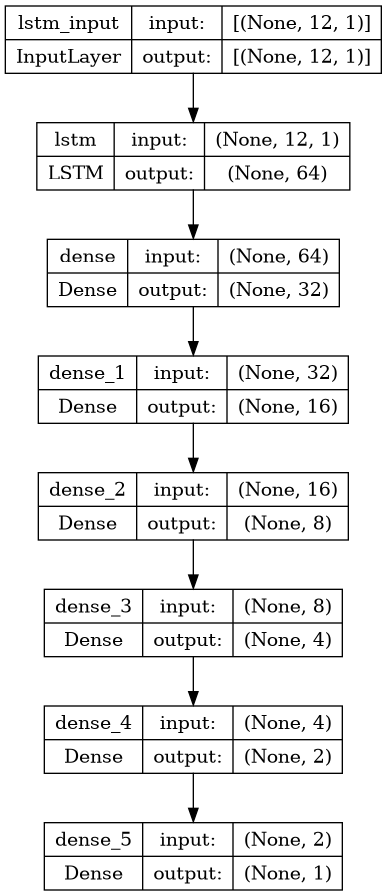

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Test dataset

In [17]:
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50
326/326 [==============================] - 10s 5ms/step - loss: 0.1587 - mae: 0.1587
Epoch 2/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1418 - mae: 0.1418
Epoch 3/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1348 - mae: 0.1348
Epoch 4/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1255 - mae: 0.1255
Epoch 5/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1204 - mae: 0.1204
Epoch 6/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1179 - mae: 0.1179
Epoch 7/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1160 - mae: 0.1160
Epoch 8/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1148 - mae: 0.1148
Epoch 9/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1145 - mae: 0.1145
Epoch 10/50
326/326 [==============================] - 2s 5ms/step - loss: 0.1140 - mae: 0.1140
Epoch 11/50
326/326 [===========================

### Test submission

In [18]:
test_dataset = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [19]:
for column in test_dataset:
    if column != 'id':
        test_dataset[column] = test_dataset[column] / max(test_dataset[column])

In [20]:
test_dataset.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,0.087386,0.188806,0.527761,0.880000,0.493197,0.614620,0.667441,0.847644,0.742881,0.559207,0.163591
1,10408,0.008897,0.015444,0.268657,0.933333,0.236368,0.792762,0.832994,0.734222,0.534874,0.576515,0.128709
2,10409,0.011467,0.012079,0.173134,0.800000,0.138780,0.723073,0.767935,0.797333,0.594305,0.604746,0.071863
3,10410,0.009885,0.014163,0.149254,0.800000,0.121260,0.792762,0.821377,0.738667,0.490301,0.600244,0.109814
4,10411,0.005437,0.006267,0.164179,0.666667,0.137262,0.739938,0.713041,0.777778,0.553033,0.576393,0.085192


In [21]:
predictions = model.predict(test_dataset)

217/217 [==============================] - 1s 2ms/step


Model was trained to predict normalised hardness values so need to unnormalise them

In [22]:
predictions = predictions * 10 # 10 is max value of hardness in training dataset

Create subbmission flie

In [23]:
submission = pd.DataFrame()
submission['id'] = test_dataset['id']
submission['Hardness'] = predictions

In [24]:
submission.head()

,id,Hardness
0,10407,2.584831
1,10408,5.189557
2,10409,5.794271
3,10410,5.757705
4,10411,5.068625


In [25]:
submission.describe()

,id,Hardness
count,6939.000000,6939.000000
mean,13876.000000,4.849234
std,2003.261091,1.210956
min,10407.000000,1.488727
25%,12141.500000,3.782436
50%,13876.000000,5.607835
75%,15610.500000,5.759692
max,17345.000000,6.078226


In [26]:
submission.to_csv('/kaggle/working/submission.csv',index=False,header=True)